# Word Cloud for Reviews

**Note: The following preprocesssing codes are copied from the other files**

In [5]:
# Import libraries
import requests
import json
import time
import pandas as pd
from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [6]:
df = pd.read_csv(open('reviews.csv','rU'))

/Users/alicexia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [7]:
import string
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [8]:
def pre_process(df):
    new_df = df
    # Extract reviews and ratings
    new_df = new_df[['text', 'rating']]
    
    # remove invalid rows with ",text,rating"
    new_df = new_df[new_df.rating.astype(str).str.contains("rating") == False]

    # convert rating values to float
    new_df['rating'] = new_df['rating'].astype(float).fillna(0)
    # add length column to record word count of reviews
    new_df['length'] = new_df['text'].astype(str).apply(word_count)
    print(new_df.iloc[0].length)
    
    # remove punctations
    
    return new_df
    
def word_count(str):
    return len(str.split())

df = pre_process(df)
print(df)

133
                                                     text  rating  length
0       Had an amazing four course dinner here! 1. Wil...     5.0     133
1       A Saturday date night with my boyfriend - and ...     4.0     112
2       Was able to get a seat at the bar at 1700 with...     5.0      57
3       Tasting menu here is delicious! Alexander's pa...     4.0      15
4       One of the best fine dining restaurants I've b...     5.0     233
5       First, I must confess we had no business being...     4.0     146
6       Good food, good service, pricey but for an occ...     4.0     444
7       Having been to the Steakhouse in Cupertino, I ...     4.0     409
8       Made a reservation the day before and came her...     4.0     303
9       ** Upscale restaurant with both steak and seaf...     4.0     199
10      This review is for a catered event our company...     2.0     178
11      Excellent service and good ambiance makes this...     4.0      70
12      The food here was so good!

## Word Cloud

Install [wordcloud](https://github.com/amueller/word_cloud) with command `conda install -c conda-forge wordcloud`.

In [14]:
def get_words_for_rating(rating):
    raw_text_list = df[df.rating == rating].text.tolist()
    raw_text = ' '.join(raw_text_list)
    return text_process(raw_text)

In [15]:
low_rating = 1.0
low_rating_words = get_words_for_rating(low_rating)

In [16]:
high_rating = 5.0
high_rating_words = get_words_for_rating(high_rating)

In [17]:
def get_common_words(words1, words2, num=20):
    counter1 = Counter(words1)
    counter2 = Counter(words2)
    freq_words1 = set([word[0] for word in counter1.most_common()[:num]])
    freq_words2 = set([word[0] for word in counter2.most_common()[:num]])
    common_words = list(freq_words1 & freq_words2)
    return common_words

In [18]:
def generate_word_cloud(words_list, stop_words=[], max_words=100):
    word_cloud = WordCloud(background_color='white',
                          stopwords=stop_words,
                          max_words=max_words,
                         ).generate(' '.join(words_list))
    return word_cloud

def show_word_cloud(word_cloud):
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

In [19]:
common_words = get_common_words(low_rating_words, high_rating_words)
common_words

['service',
 'food',
 'get',
 'good',
 'back',
 'restaurant',
 'time',
 'like',
 'place',
 'go',
 'one']

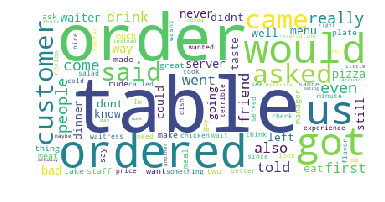

In [20]:
low_rating_word_cloud = generate_word_cloud(low_rating_words, stop_words=common_words)
show_word_cloud(low_rating_word_cloud)

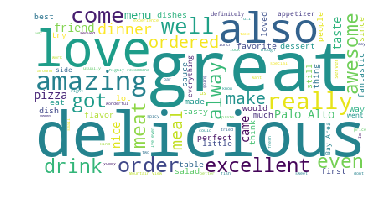

In [21]:
high_rating_word_cloud = generate_word_cloud(high_rating_words, stop_words=common_words)
show_word_cloud(high_rating_word_cloud)

## Nouns word cloud in low/high rating reviews

In [22]:
def get_nouns_from_words(all_words):
    all_words_with_tag = nltk.pos_tag(all_words)
    return [word[0] for word in all_words_with_tag if word[1] == 'NN']

In [23]:
low_rating_nouns = get_nouns_from_words(low_rating_words)
high_rating_nouns = get_nouns_from_words(high_rating_words)

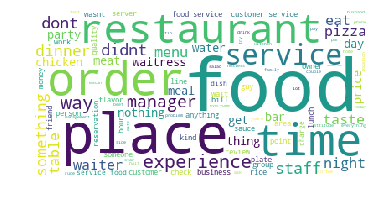

In [27]:
low_rating_nouns_word_cloud = generate_word_cloud(low_rating_nouns)
show_word_cloud(low_rating_nouns_word_cloud)

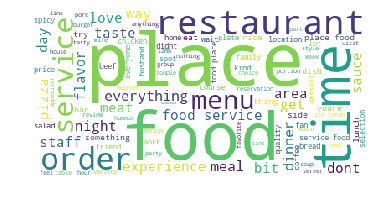

In [28]:
high_rating_nouns_word_cloud = generate_word_cloud(high_rating_nouns)
show_word_cloud(high_rating_nouns_word_cloud)